In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

In [ ]:
df = pd.read_csv("/content/ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df.shape

(3755, 11)

In [ ]:
unique_values = df['employment_type'].unique()

# Print the unique string values
for value in unique_values:
    print(value)

FT
CT
FL
PT


In [ ]:
#Mendifinisikan missing values
missing_values = df.isnull()

#Menghitung jumlah missing values di setiap kolom
missing_counts = missing_values.sum(axis=0)

print(missing_counts)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
subset = df[['experience_level', 'employment_type', 'job_title','salary_in_usd']]
subset

,experience_level,employment_type,job_title,salary_in_usd
0,SE,FT,Principal Data Scientist,85847
1,MI,CT,ML Engineer,30000
2,MI,CT,ML Engineer,25500
3,SE,FT,Data Scientist,175000
4,SE,FT,Data Scientist,120000
...,...,...,...,...
3750,SE,FT,Data Scientist,412000
3751,MI,FT,Principal Data Scientist,151000
3752,EN,FT,Data Scientist,105000
3753,EN,CT,Business Data Analyst,100000


In [ ]:
subset2 = subset[subset["employment_type"] == 'FT']
subset2

,experience_level,employment_type,job_title,salary_in_usd
0,SE,FT,Principal Data Scientist,85847
3,SE,FT,Data Scientist,175000
4,SE,FT,Data Scientist,120000
5,SE,FT,Applied Scientist,222200
6,SE,FT,Applied Scientist,136000
...,...,...,...,...
3749,SE,FT,Data Specialist,165000
3750,SE,FT,Data Scientist,412000
3751,MI,FT,Principal Data Scientist,151000
3752,EN,FT,Data Scientist,105000


In [ ]:
sorted_subset2 = subset2.nlargest(100, 'salary_in_usd')
sort_subset2 = sorted_subset2.to_string(index=False)

print(sort_subset2)

experience_level employment_type                          job_title  salary_in_usd
              MI              FT                 Research Scientist         450000
              MI              FT                       Data Analyst         430967
              SE              FT                       AI Scientist         423834
              MI              FT Applied Machine Learning Scientist         423000
              SE              FT                     Data Scientist         412000
              SE              FT                Data Analytics Lead         405000
              SE              FT                       Data Analyst         385000
              SE              FT             Applied Data Scientist         380000
              SE              FT                     Data Architect         376080
              SE              FT Machine Learning Software Engineer         375000
              SE              FT             Data Science Tech Lead         375000
    

In [ ]:
mean_sorted_subset2 = sorted_subset2.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

# Print the mean values
print(mean_sorted_subset2)

                             job_title  salary_in_usd
0                         AI Scientist  423834.000000
1   Applied Machine Learning Scientist  423000.000000
2                         Data Analyst  407983.500000
3                  Data Analytics Lead  405000.000000
4               Applied Data Scientist  380000.000000
5               Data Science Tech Lead  375000.000000
6                   Research Scientist  365000.000000
7             Director of Data Science  339100.000000
8                       Data Architect  333926.666667
9                         Head of Data  329500.000000
10  Machine Learning Software Engineer  323500.000000
11                   Applied Scientist  322933.333333
12                Head of Data Science  314100.000000
13            Computer Vision Engineer  311405.000000
14                      Data Scientist  299972.500000
15                Data Science Manager  299257.142857
16                       Data Engineer  298979.166667
17           Machine Learnin

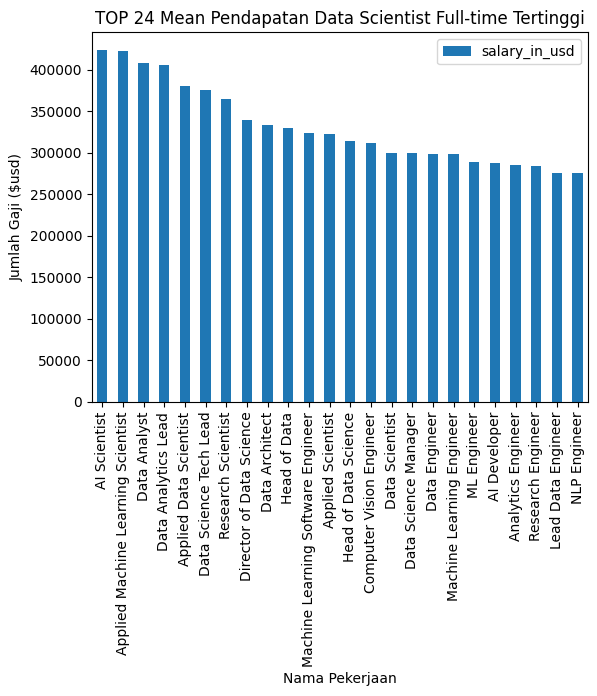

In [ ]:
mean_sorted_subset2.plot(x='job_title', y='salary_in_usd', kind='bar')

# Set title, x-label, and y-label
plt.title('TOP 24 Mean Pendapatan Data Scientist Full-time Tertinggi')
plt.xlabel('Nama Pekerjaan')
plt.ylabel('Jumlah Gaji ($usd)')

# Tampilkan plot
plt.show()

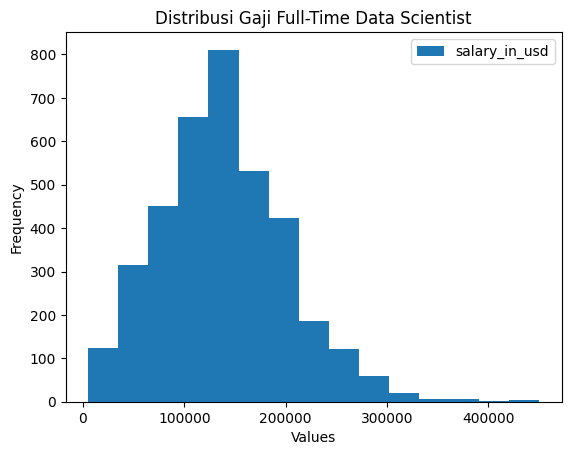

In [ ]:
subset2.plot(y='salary_in_usd', kind='hist', bins=15)

# Set title, x-label, and y-label
plt.title('Distribusi Gaji Full-Time Data Scientist')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Tampilkan plot
plt.show()


In [ ]:
column_data = subset2['salary_in_usd']

# Kalkulasi quartil dan IQR
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

# Menentukan ambang batas untuk outlier
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Mengidentifikasi outliers
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

#Print outlier
print(outliers)
print ("Batas oulier atas", upper_bound)
print ("Batas outlier bawah", lower_bound)

33      342810
68      309400
83      300000
133     342300
145     318300
         ...  
3468    380000
3522    450000
3697    325000
3747    423000
3750    412000
Name: salary_in_usd, Length: 62, dtype: int64
Batas oulier atas 294289.0
Batas outlier bawah -23615.0


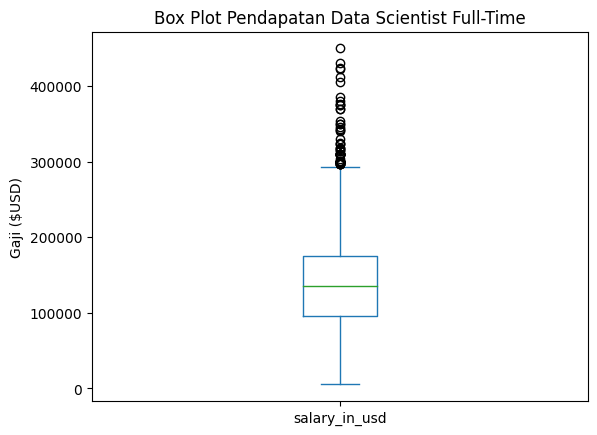

In [ ]:
subset2.plot(y='salary_in_usd', kind='box')

# Set title, x-label, and y-label
plt.title('Box Plot Pendapatan Data Scientist Full-Time')
plt.ylabel('Gaji ($USD)')

# Tampilkan plot
plt.show()

In [ ]:
mean_sorted_subset3 = subset2.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
mean_sorted_subset3

,experience_level,salary_in_usd
0,EX,192974.566372
1,SE,153214.454799
2,MI,105321.489899
3,EN,80496.529801


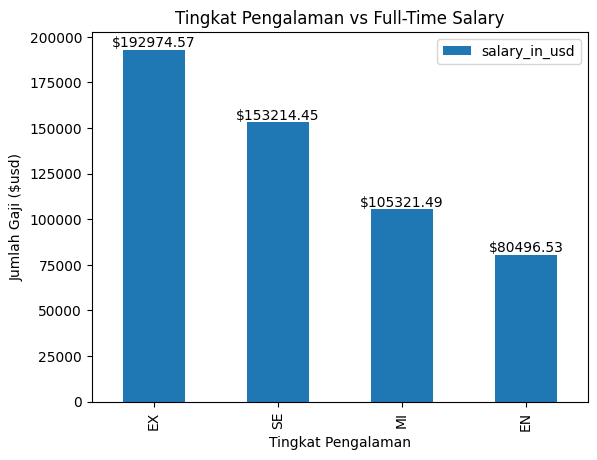

In [ ]:
ax = mean_sorted_subset3.plot(x='experience_level', y='salary_in_usd', kind='bar')

# Set title, x-label, and y-label
plt.title('Tingkat Pengalaman vs Full-Time Salary')
plt.xlabel('Tingkat Pengalaman')
plt.ylabel('Jumlah Gaji ($usd)')

# Menambahkan label nilai setiap bar
for p in ax.patches:
    ax.annotate('$' + format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
    , ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()
